A local school district has a goal to reach a 95% graduation rate bythe end of the decade by identifying students who need 
intervention before they drop out of school. As a software engineer contacted by the school district, your task is to model the 
factors that predict how likely a student is to pass their high school final exam, by constructing an
intervention system that leverages supervised learning techniques. The board of supervisors has asked that you find the most
effective model that uses the least amount of computation costs to save on the budget. You will need to analyze
the dataset on students' performance and develop a model that will predict a given student will pass, quantifying whether an 
intervention is necessary.

In [82]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [83]:
# Loading the dataset
stud_df=pd.read_csv('student-data.csv')
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [84]:
stud_df.shape

(395, 31)

In [85]:
stud_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [86]:
#finding missing values
stud_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

No null values present in the dataset

In [87]:
# Analysing the data set on student's performance
no_students=stud_df.shape[0]
no_passed=stud_df[stud_df['passed']=='yes'].shape[0]
no_failed=stud_df[stud_df['passed']=='no'].shape[0]
grad_rate=(no_passed/no_students)*100
print('\n Total no. of students = ', no_students)
print('\n No. of students passed = ' ,no_passed)
print('\n No. of students failed = ' ,no_failed)
print('\n Graduation rate = ',grad_rate)


 Total no. of students =  395

 No. of students passed =  265

 No. of students failed =  130

 Graduation rate =  67.08860759493672


In [88]:
# Preprocessing
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [89]:
stud_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [90]:
#Here the target variable is 'passed'
stud_df['passed'].value_counts

<bound method IndexOpsMixin.value_counts of 0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object>

In [91]:
# Encode target variable 'Passed'
enc = {'yes':1, 'no':0}
stud_df['passed'] = stud_df['passed'].map(enc)

In [92]:
stud_df['passed'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: passed, Length: 395, dtype: int64>

In [93]:
# Setting x and y parameters
# x denotes feature columns and y denotes target columns
x=stud_df.drop(['passed'],axis=1)
y=pd.DataFrame(stud_df['passed'])

In [94]:
x.shape

(395, 30)

In [95]:
# Feature engineering

We can combine :
    
    Mothers and Fathers education to create a parents education column

    Daily and Weekend alcohol consumption to create a total alcohol consumption

   

In [96]:
print(x['Fedu'].value_counts().sort_index(ascending=False))
print(x['Medu'].value_counts().sort_index(ascending=False))

4     96
3    100
2    115
1     82
0      2
Name: Fedu, dtype: int64
4    131
3     99
2    103
1     59
0      3
Name: Medu, dtype: int64


In [97]:
# Parent education=Mother education + Father education
x['Pedu']=x['Medu']+x['Fedu']
print(x['Pedu'].value_counts().sort_index(ascending=False))

8    70
7    58
6    64
5    47
4    72
3    43
2    39
1     2
Name: Pedu, dtype: int64


In [98]:
print(x['Dalc'].value_counts().sort_index(ascending=False))
print(x['Walc'].value_counts().sort_index(ascending=False))

5      9
4      9
3     26
2     75
1    276
Name: Dalc, dtype: int64
5     28
4     51
3     80
2     85
1    151
Name: Walc, dtype: int64


In [99]:
# Total alcohol= Daily alcohol + Weekly alcohol
x['Talc']=x['Dalc']+x['Walc']
print(x['Talc'].value_counts().sort_index(ascending=False))

10      9
9       4
8       9
7      17
6      35
5      45
4      60
3      66
2     150
Name: Talc, dtype: int64


In [100]:
# Dropping the features Medu, Fedu, Dalc, Walc
x=x.drop(['Medu','Fedu','Dalc','Walc'], axis=1)

In [101]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'Pedu', 'Talc'],
      dtype='object')

In [102]:
x.shape

(395, 28)

Now there are 28 feature columns which consists of numerical and categorical features

In [103]:
# For numerical features
x.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Pedu,Talc
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,5.270886,3.772152
std,1.276043,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,1.966738,1.984389
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,4.000000,2.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,3.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,7.000000,5.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,8.000000,10.000000


In [104]:
# For categorical features
x.describe(include=[object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


for categorical features,

count - number of objects

unique - the number of unique values ​​for the characteristic

top is the most common value for a characteristic

freq - frequency of repetition of the most common value for the characteristic

In [105]:
# Defining the numerical and categotical features
categorical_features = [c for c in x.columns if x[c].dtype.name == 'object']
numerical_features = [c for c in x.columns if x[c].dtype.name != 'object']
x_describe = x.describe(include=[object])

In [106]:
# The categorical features are of two types : binary and non binary
binary_columns = [c for c in categorical_features if x_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_features if x_describe[c]['unique'] > 2]
binary_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [107]:
nonbinary_columns

['Mjob', 'Fjob', 'reason', 'guardian']

In [108]:
## Label Encoding of nonbinary columns
# Label encoding  'Mjob'
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
mjob=['Mjob']
for i in np.arange(len(mjob)):
    x[mjob[i]]=labelenc.fit_transform(x[mjob[i]])

In [109]:
x['Mjob'].value_counts()

2    141
3    103
0     59
4     58
1     34
Name: Mjob, dtype: int64

In [111]:
# Label encoding  'Fjob'
fjob=['Fjob']
for i in np.arange(len(fjob)):
    x[fjob[i]]=labelenc.fit_transform(x[fjob[i]])

In [112]:
x['Fjob'].value_counts()

2    217
3    111
4     29
0     20
1     18
Name: Fjob, dtype: int64

In [113]:
# Label encoding  'reason'
reas=['reason']
for i in np.arange(len(reas)):
    x[reas[i]]=labelenc.fit_transform(x[reas[i]])

In [114]:
x['reason'].value_counts()

0    145
1    109
3    105
2     36
Name: reason, dtype: int64

In [115]:
# Label encoding  'guardian'
guard=['guardian']
for i in np.arange(len(guard)):
    x[guard[i]]=labelenc.fit_transform(x[guard[i]])

In [116]:
x['guardian'].value_counts()

1    273
0     90
2     32
Name: guardian, dtype: int64

In [117]:
x.describe()

,age,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Pedu,Talc
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.169620,2.281013,1.255696,0.853165,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,5.270886,3.772152
std,1.276043,1.227473,0.863542,1.208236,0.536684,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,1.966738,1.984389
min,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
25%,16.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,4.000000,2.000000
50%,17.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,3.000000
75%,18.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,7.000000,5.000000
max,22.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,8.000000,10.000000


Now the categorical features 'Mjob', 'Fjob', 'reason' and ''guardian' are converted into numerical features

In [119]:
## Combining Mjob and Fjob to Pjob
# Pjob = Mjob + Fjob
x['Pjob']=x['Mjob']+x['Fjob']

In [120]:
x['Pjob'].value_counts()

4    122
5     71
6     70
2     44
3     40
7     27
8     12
0      7
1      2
Name: Pjob, dtype: int64

In [121]:
# Droping the features Mjob and Fjob
x=x.drop(['Mjob','Fjob'],axis=1)

In [122]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Pedu',
       'Talc', 'Pjob'],
      dtype='object')

In [123]:
x.shape

(395, 27)

In [124]:
# Label Encoding the binary columns
for f in binary_columns:
    x[f]=labelenc.fit_transform(x[f])
    

In [125]:
x

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,internet,romantic,famrel,freetime,goout,health,absences,Pedu,Talc,Pjob
0,0,0,18,1,0,0,0,1,2,2,...,0,0,4,3,4,3,6,8,2,4
1,0,0,17,1,0,1,0,0,1,2,...,1,0,5,3,3,3,4,2,2,2
2,0,0,15,1,1,1,2,1,1,2,...,1,0,4,3,2,3,10,2,5,2
3,0,0,15,1,0,1,1,1,1,3,...,1,1,3,2,2,5,2,6,2,4
4,0,0,16,1,0,1,1,0,1,2,...,0,0,4,3,2,5,4,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,0,2,1,2,...,0,0,5,5,4,4,11,4,9,6
391,1,1,17,1,1,1,0,1,2,1,...,1,0,2,4,5,2,3,4,7,6
392,1,1,21,0,0,1,0,2,1,1,...,0,0,5,5,3,3,3,2,6,4
393,1,1,18,0,1,1,0,1,3,1,...,1,0,4,4,1,5,0,5,7,5


In [126]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   reason      395 non-null    int32
 7   guardian    395 non-null    int32
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    int32
 12  famsup      395 non-null    int32
 13  paid        395 non-null    int32
 14  activities  395 non-null    int32
 15  nursery     395 non-null    int32
 16  higher      395 non-null    int32
 17  internet    395 non-null    int32
 18  romantic    395 non-null    int32
 19  famrel      395 non-null    int64
 20  freetime    395 non-null    int6

Now all the features became numerical features

In [127]:
# Splitting the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [128]:
x_train.shape

(276, 27)

In [129]:
x_test.shape

(119, 27)

In [130]:
y_train.shape

(276, 1)

In [131]:
y_test.shape

(119, 1)

In [132]:
## Building the models
# Model 1 : Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [136]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_pred, y_test))
print('Accuracy :',accuracy_score(y_test,y_pred))           

Confusion matrix : 
 [[13 26]
 [ 8 72]]
F1_score : 0.8089887640449438
Accuracy : 0.7142857142857143


In [67]:
# Feature importance
feature_imp=pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feature_imp

failures      8.927910
absences      8.335981
Pjob          6.165594
Pedu          6.082301
Talc          5.683840
age           5.619155
goout         5.503560
health        4.853981
freetime      4.536230
reason        4.444037
famrel        4.236607
studytime     4.147004
guardian      3.085591
traveltime    2.711102
sex           2.654494
internet      2.517673
romantic      2.488417
schoolsup     2.334763
activities    2.311780
paid          2.034512
famsup        2.009970
famsize       1.893384
address       1.813024
nursery       1.532171
higher        1.511344
school        1.483941
Pstatus       1.081632
dtype: float64

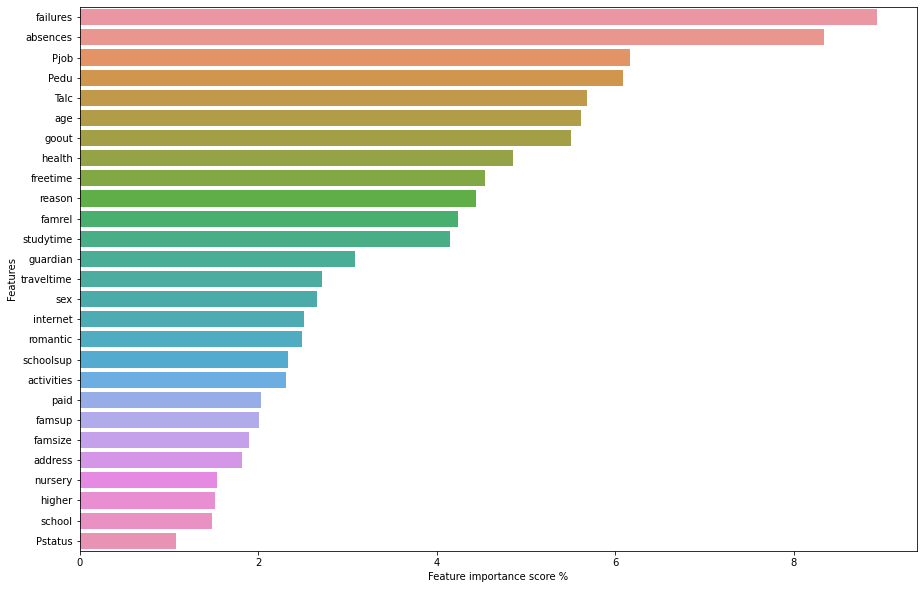

In [138]:
plt.figure(figsize=(15,10))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.ylabel('Features')
plt.xlabel('Feature importance score %')
plt.show()

In [139]:
# Model 2 : Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [140]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_pred, y_test))
print('Accuracy :',accuracy_score(y_test,y_pred))           

Confusion matrix : 
 [[18 21]
 [25 55]]
F1_score : 0.7051282051282051
Accuracy : 0.6134453781512605


Now 2 models - Random Forest Model and Decision Tree Model are created.

By analyzing the accuracy,f1_score and confusion matrix , it is clear that Random Forest Model is the best suited for the 
prediction